# How are in-demand skills trending for Data Analysis?

### Methodology 

1. Aggregate skill counts monthly
2. Re-analyze based on percetage of total jobs
3. Plot the monthly skill demand

### Original Exploration 

[12_Exercise_Trending_Skills](../2_Advanced/12_Exercise_Trending_Skills.ipynb)

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for EU Data Analyst roles

In [8]:
# Define list of EU countries
EU_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

df_DA_EU = df[(df['job_country'].isin(EU_countries)) & (df['job_title_short'] == 'Data Analyst')].copy()

## Group the Skills by Month

In [9]:
df_DA_EU['job_posted_month_no'] = df_DA_EU['job_posted_date'].dt.month

df_DA_EU_explode = df_DA_EU.explode('job_skills')

## Pivot in Prep for Plotting

Create a pivot table from the ``df_DA_EU_explode``, setting 'month' as the index, job_skills as the columns, and fills missing entries with zero.

In [10]:
df_DA_EU_pivot = df_DA_EU_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_EU_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,arch,asana,asp.net,asp.net core,...,vue.js,watson,webex,windows,wire,word,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,97,0,176,25,2,10,0,4,6,0,...,4,2,6,46,0,260,0,0,6,25
2,93,0,118,15,0,7,0,8,1,0,...,1,0,2,42,0,179,0,0,1,12
3,103,0,118,20,0,12,0,2,1,0,...,2,1,2,61,0,176,0,0,2,13
4,74,1,100,8,0,5,0,4,1,0,...,0,1,3,44,1,213,0,0,0,5
5,60,1,78,12,0,8,0,3,0,0,...,0,0,4,21,1,142,1,0,3,3
6,79,1,88,16,0,7,0,3,1,0,...,1,2,4,30,3,192,5,0,4,7
7,80,0,84,6,0,3,0,8,4,0,...,0,1,3,37,0,144,2,0,3,14
8,57,1,78,9,0,3,1,1,2,1,...,0,1,3,32,3,163,0,0,4,5
9,35,0,55,9,0,8,0,0,3,0,...,1,0,0,31,1,145,1,0,1,2


#### Sort columns by count and change month numbers to names

It adds a new row labeled ``Total`` that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [11]:
df_DA_EU_pivot.loc['Total'] = df_DA_EU_pivot.sum()
df_DA_EU_pivot = df_DA_EU_pivot[df_DA_EU_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_EU_pivot = df_DA_EU_pivot.drop('Total')

df_DA_EU_pivot

job_skills,sql,python,excel,power bi,tableau,r,sas,sap,azure,vba,...,mlr,arch,esquisse,cordova,f#,mattermost,blazor,xamarin,nuxt.js,ovh
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2979,1958,1716,1384,1371,927,956,469,456,321,...,0,0,0,0,0,0,0,0,1,0
2,2379,1615,1336,1115,1142,780,770,420,363,298,...,0,0,0,0,0,0,0,0,0,0
3,2317,1623,1346,1125,1067,782,728,361,351,243,...,0,0,0,0,0,0,1,0,0,0
4,2190,1537,1312,1090,965,690,696,354,333,250,...,0,0,0,0,1,0,0,0,0,1
5,1943,1355,1136,927,834,574,512,298,310,217,...,0,0,0,0,0,0,0,0,0,0
6,2260,1515,1352,1138,959,638,590,368,334,237,...,0,0,0,0,0,0,0,0,0,0
7,2152,1467,1288,1075,979,653,502,371,309,197,...,0,0,0,0,0,0,0,0,0,0
8,2136,1469,1333,1125,965,686,576,421,375,194,...,0,1,0,0,0,0,0,0,0,0
9,1736,1197,996,885,697,519,394,314,309,167,...,0,0,0,0,0,0,0,0,0,0


## Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in ``df_DA`` by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in ``DA_totals``. This is needed to compute the percentages.

In [12]:
DA_totals = df_DA_EU.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     6478
2     5189
3     5078
4     4745
5     4107
6     4919
7     4733
8     4994
9     4140
10    4526
11    4442
12    3862
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the ``df_DA_pivot`` DataFrame, which contains skill counts, by the monthly totals in ``DA_totals`` and multiplying by 100. The new DataFrame, ``df_DA_pivot_percent``, shows skill distributions as percentages of total monthly job entries.

In [6]:
df_DA_EU_perc = df_DA_EU_pivot.div(DA_totals/100, axis=0)

df_DA_EU_perc = df_DA_EU_perc.reset_index()
df_DA_EU_perc['job_posted_month'] = df_DA_EU_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_EU_perc = df_DA_EU_perc.set_index('job_posted_month')
df_DA_EU_perc = df_DA_EU_perc.drop(columns='job_posted_month_no')

df_DA_EU_perc

job_skills,sql,python,excel,power bi,tableau,r,sas,sap,azure,vba,...,mlr,arch,esquisse,cordova,f#,mattermost,blazor,xamarin,nuxt.js,ovh
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,45.986416,30.225378,26.489657,21.364619,21.163939,14.309972,14.757641,7.239889,7.039210,4.955233,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015437,0.000000
Feb,45.846984,31.123531,25.746772,21.487763,22.008094,15.031798,14.839083,8.094045,6.995568,5.742918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,45.628200,31.961402,26.506499,22.154391,21.012210,15.399764,14.336353,7.109098,6.912170,4.785349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019693,0.000000,0.000000,0.000000
Apr,46.153846,32.391992,27.650158,22.971549,20.337197,14.541623,14.668072,7.460485,7.017914,5.268704,...,0.000000,0.000000,0.000000,0.000000,0.021075,0.000000,0.000000,0.000000,0.000000,0.021075
May,47.309472,32.992452,27.660093,22.571220,20.306793,13.976138,12.466521,7.255905,7.548089,5.283662,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,45.944298,30.798943,27.485261,23.134783,19.495832,12.970116,11.994308,7.481195,6.789998,4.818052,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,45.467991,30.995141,27.213184,22.712867,20.684555,13.796746,10.606381,7.838580,6.528629,4.162265,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,42.771326,29.415298,26.692030,22.527032,19.323188,13.736484,11.533841,8.430116,7.509011,3.884662,...,0.000000,0.020024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,41.932367,28.913043,24.057971,21.376812,16.835749,12.536232,9.516908,7.584541,7.463768,4.033816,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Plot Monthly Skill Demand

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the ``df_DA_pivot_percent`` DataFrame. Also the legend is moved outside of the plot for readability.

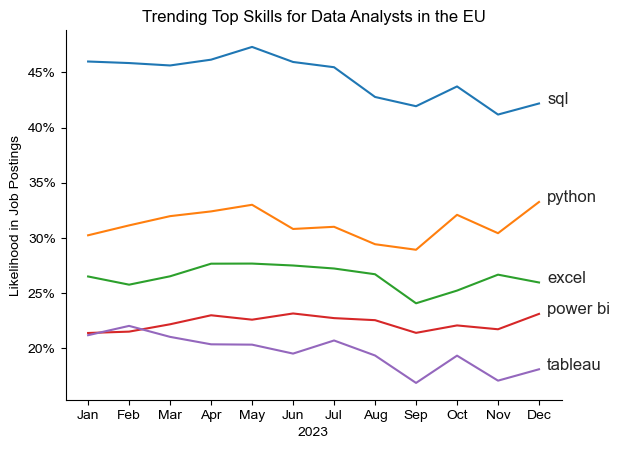

In [7]:
df_plot = df_DA_EU_perc.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the EU')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):    
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

